In [1]:
import sys
print("Python: {}".format(sys.version))
import numpy as np
print("Numpy: {}".format(np.__version__))
import pandas as pd
print("Pandas: {}".format(pd.__version__))
import matplotlib 
print("Matplotlib: {}".format(matplotlib.__version__))
import seaborn as sns
print("Seaborn: {}".format(sns.__version__))
import statsmodels.api as sm
print("Statsmodels.api: {}".format(sm.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.16.5
Pandas: 0.25.1
Matplotlib: 3.1.1
Seaborn: 0.9.0
Statsmodels.api: 0.10.1


In [2]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [5]:
data=pd.read_excel("Data_Train.xlsx")

In [6]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
data=data.dropna()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [10]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [11]:
data.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [12]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [13]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [14]:
data.shape

(5975, 12)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5975 non-null object
Location             5975 non-null object
Year                 5975 non-null int64
Kilometers_Driven    5975 non-null int64
Fuel_Type            5975 non-null object
Transmission         5975 non-null object
Owner_Type           5975 non-null object
Mileage              5975 non-null object
Engine               5975 non-null object
Power                5975 non-null object
Seats                5975 non-null float64
Price                5975 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [16]:
data.groupby("Name").size()

Name
Ambassador Classic Nova Diesel    1
Audi A3 35 TDI Attraction         1
Audi A3 35 TDI Premium            1
Audi A3 35 TDI Premium Plus       1
Audi A3 35 TDI Technology         1
                                 ..
Volvo XC60 D4 Summum              1
Volvo XC60 D5                     3
Volvo XC60 D5 Inscription         1
Volvo XC90 2007-2015 D5 AT AWD    1
Volvo XC90 2007-2015 D5 AWD       1
Length: 1855, dtype: int64

In [17]:
data.groupby("Year").size()

Year
1998      4
1999      2
2000      4
2001      7
2002     14
2003     15
2004     29
2005     55
2006     75
2007    123
2008    169
2009    196
2010    339
2011    461
2012    572
2013    648
2014    795
2015    741
2016    740
2017    586
2018    298
2019    102
dtype: int64

In [18]:
data.groupby("Fuel_Type").size()

Fuel_Type
CNG         56
Diesel    3195
LPG         10
Petrol    2714
dtype: int64

In [19]:
data.groupby("Seats").size()

Seats
0.0        1
2.0       16
4.0       99
5.0     5012
6.0       31
7.0      674
8.0      134
9.0        3
10.0       5
dtype: int64

In [20]:
data=data[data["Year"].between(1950,2020,inclusive="True")]
data=data[data["Seats"].between(1,10,inclusive="False")]

In [21]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [22]:
data["Kilometers_Driven"].max()

6500000

10.0

In [24]:
data["Price"].max()

160.0

In [25]:
data["Year"].max()

2019

In [26]:
data["Year"].min()

1998

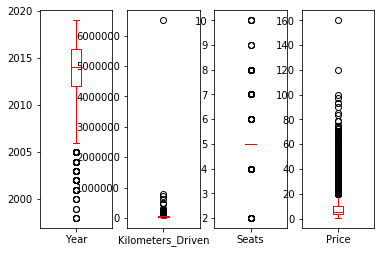

In [27]:
data.plot(kind="box",subplots=True,color="red")
plt.show()

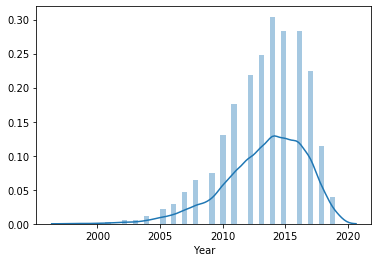

In [28]:
sns.distplot(data["Year"])

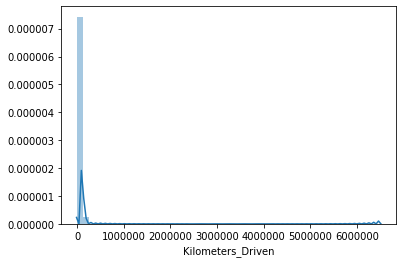

In [29]:
sns.distplot(data["Kilometers_Driven"])

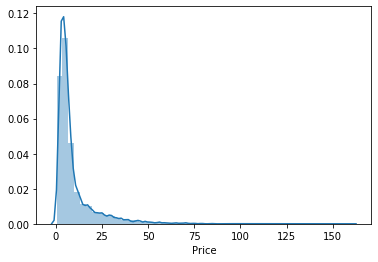

In [30]:
sns.distplot(data["Price"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001259DE3BBC8>,
      dtype=object)

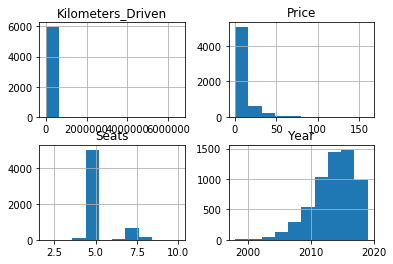

In [31]:
data.hist()

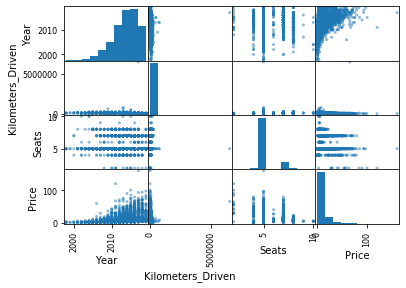

In [32]:
scatter_matrix(data)
plt.show()

In [33]:
data.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.172622,0.011915,0.305874
Kilometers_Driven,-0.172622,1.000000,0.084196,-0.011356
Seats,0.011915,0.084196,1.000000,0.053283
Price,0.305874,-0.011356,0.053283,1.000000


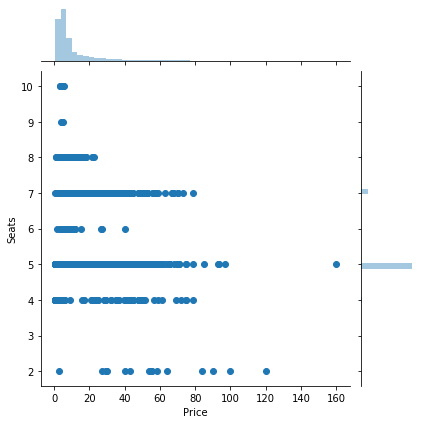

In [34]:
sns.jointplot(x="Price", y="Seats", data=data)

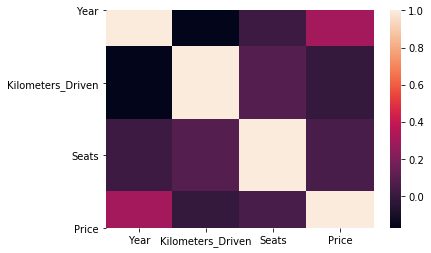

In [35]:
sns.heatmap(data.corr())

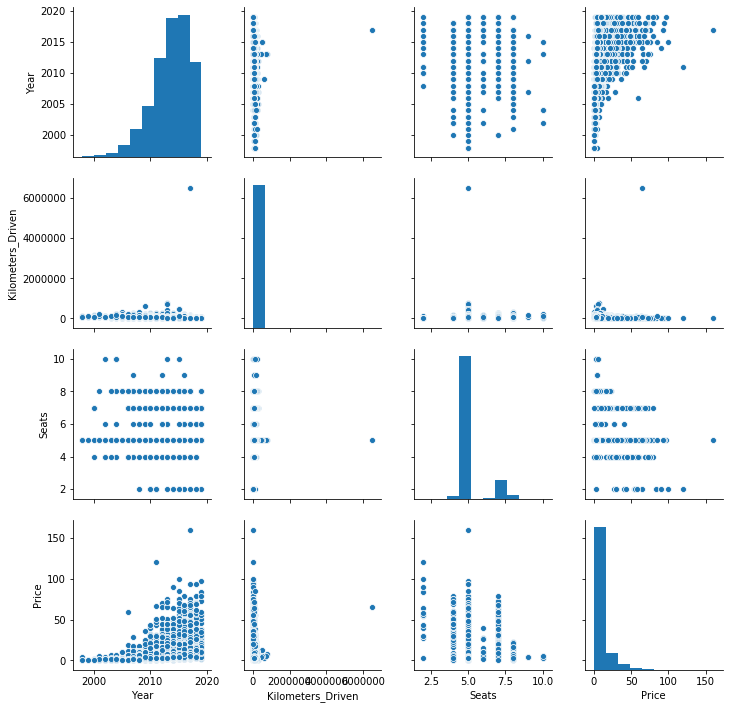

In [36]:
sns.pairplot(data)
plt.show()

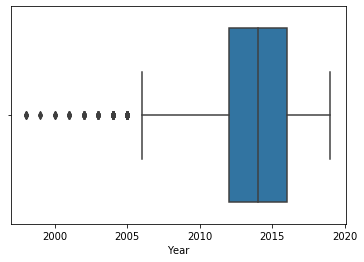

In [37]:
sns.boxplot(x='Year',data=data)

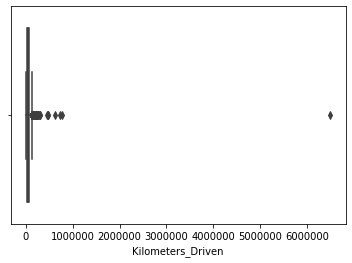

In [38]:
sns.boxplot(x='Kilometers_Driven',data=data)

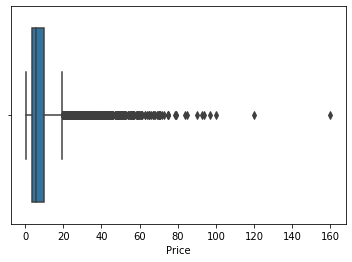

In [39]:
sns.boxplot(x="Price",data=data)

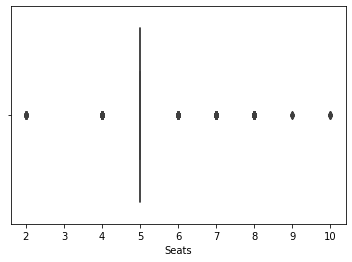

In [40]:
sns.boxplot(x="Seats",data=data)

In [41]:
cat_val=["Name","Location","Year","Kilometers_Driven","Fuel_Type","Transmission","Owner_Type","Seats"]
for i in cat_val:
    print([i],':',data[i].unique())

['Name'] : ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']
['Location'] : ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['Year'] : [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]
['Kilometers_Driven'] : [72000 41000 46000 ... 45004 70602 27365]
['Fuel_Type'] : ['CNG' 'Diesel' 'Petrol' 'LPG']
['Transmission'] : ['Manual' 'Automatic']
['Owner_Type'] : ['First' 'Second' 'Fourth & Above' 'Third']
['Seats'] : [ 5.  7.  8.  4.  6.  2. 10.  9.]


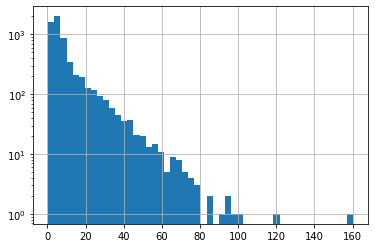

In [42]:
data["Price"].hist(bins=50,log=True)